In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# upload the dataset
df=pd.read_csv('/content/Uber.csv')

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
df.dtypes

,0
START_DATE*,object
END_DATE*,object
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


In [5]:
df.shape

(1156, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.isna().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


In [8]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [9]:
df.duplicated().sum()

np.int64(1)

In [10]:
df.drop(1155, axis=0, inplace=True)

In [11]:
df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [12]:
df.shape

(1155, 7)

In [13]:
df.drop_duplicates(inplace=True) #delete duplicate
df.duplicated().sum() # to check for duplicate if any

np.int64(0)

In [14]:
#conversion to datetime
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'])
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'])

In [15]:
df.dtypes

,0
START_DATE*,datetime64[ns]
END_DATE*,datetime64[ns]
CATEGORY*,object
START*,object
STOP*,object
MILES*,float64
PURPOSE*,object


In [16]:
#creates a new column
df['DATE'] = pd.to_datetime(df['START_DATE*'])
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00


In [17]:
df['Hour'] = df['DATE'].dt.hour

In [18]:
df['Day'] = df['DATE'].dt.day

In [19]:
df['Month'] = df['DATE'].dt.month

In [20]:
df['Weekday'] = df['DATE'].dt.weekday

In [21]:
df['DayName'] = df['DATE'].dt.day_name()

In [22]:
df['MonthName'] = df['DATE'].dt.month_name()

In [23]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,DATE,Hour,Day,Month,Weekday,DayName,MonthName
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01 21:11:00,21,1,1,4,Friday,January
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,2016-01-02 01:25:00,1,2,1,5,Saturday,January
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02 20:25:00,20,2,1,5,Saturday,January
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05 17:31:00,17,5,1,1,Tuesday,January
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06 14:42:00,14,6,1,2,Wednesday,January


In [24]:
df['CATEGORY*'].value_counts()

,count
CATEGORY*,
Business,1077
Personal,77


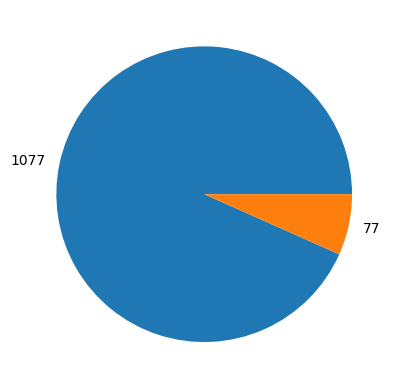

In [25]:
ForChart = df['CATEGORY*'].value_counts()
plt.pie(ForChart, labels=ForChart)
plt.show()

<Axes: xlabel='CATEGORY*', ylabel='count'>

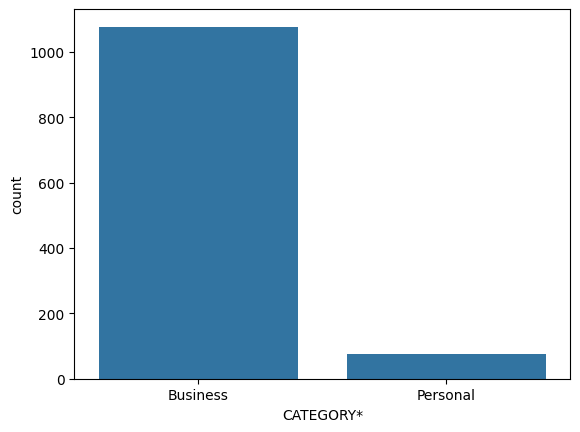

In [26]:
sns.countplot(x='CATEGORY*', data=df)

HOW LONG DO PEOPLE TRAVEL WITH UBER

<Axes: ylabel='Frequency'>

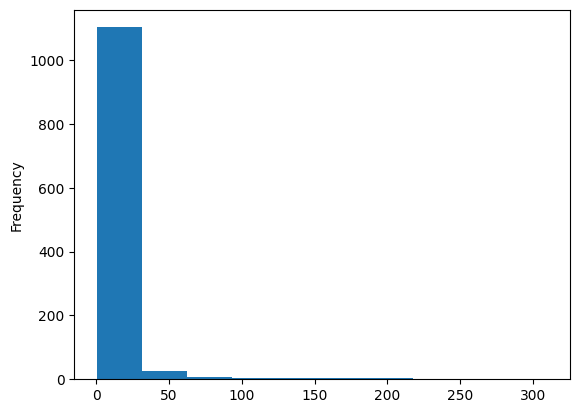

In [27]:
df['MILES*'].plot.hist()

Hours People use Uber

In [29]:
df['Hour'].value_counts()

,count
Hour,
15,98
17,95
13,94
18,94
14,89
16,88
12,77
11,72
20,71


<Axes: xlabel='Hour'>

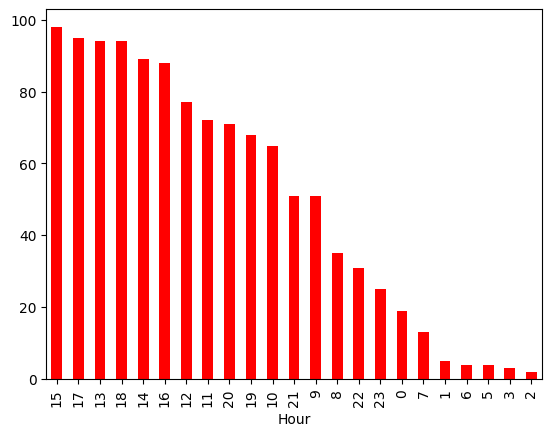

In [28]:
UberHours = df['Hour'].value_counts()
UberHours.plot(kind='bar', color='red')

The purpose for the trip

<Axes: xlabel='PURPOSE*'>

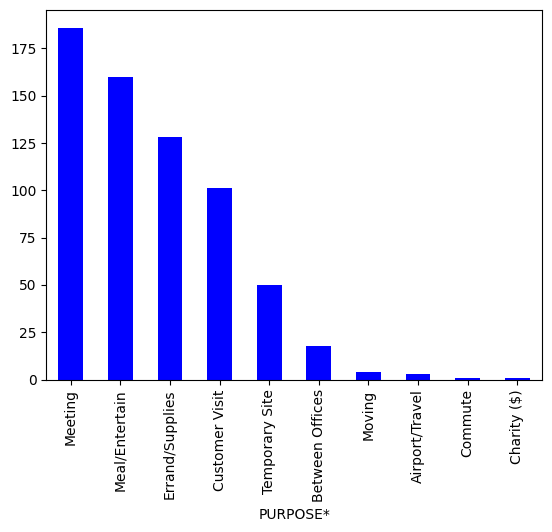

In [31]:
df['PURPOSE*'].value_counts().plot(kind='bar', color='blue')

Months with the most trips

<Axes: xlabel='MonthName'>

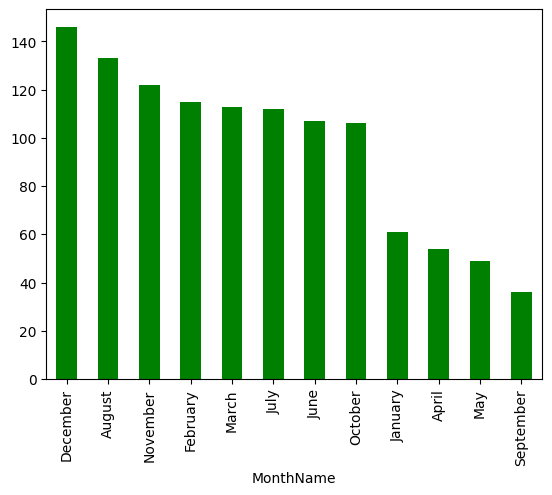

In [32]:
df['MonthName'].value_counts().plot(kind='bar', color='green')

Starting Point of Trip

<Axes: xlabel='START*'>

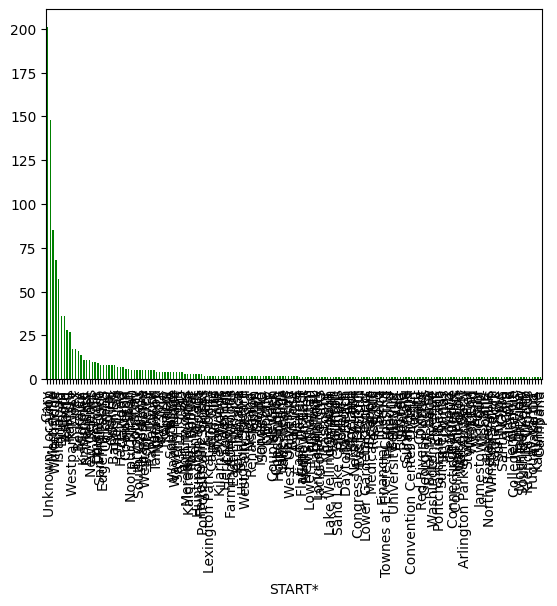

In [35]:
df['START*'].value_counts().plot(kind='bar', color='green')

<Axes: xlabel='START*'>

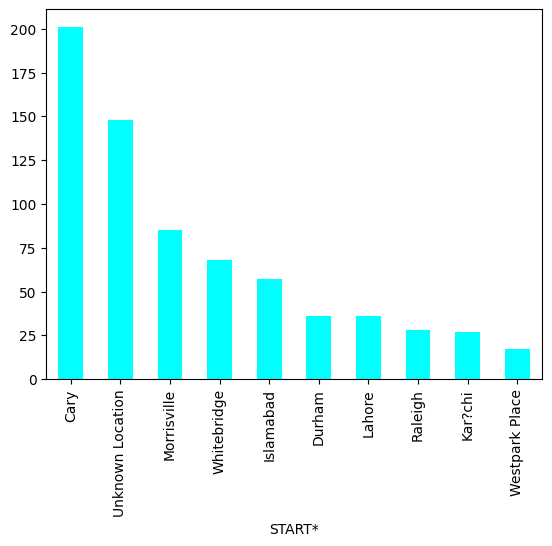

In [37]:
df['START*'].value_counts().head(10).plot(kind='bar', color='cyan')